In [3]:
import axelrod as axl
import axelrod_dojo as dojo
import matplotlib.pyplot as plt
import pprint

In [15]:
players = [axl.Cooperator(), axl.Defector(), axl.TitForTat(), axl.Alternator(), axl.Grudger(), axl.TitFor2Tats(), axl.BackStabber(), axl.Random()]

In [16]:
tournament = axl.Tournament(players=players, turns=10)
results = tournament.play()
scores = results.scores

Analysing: 100%|██████████| 25/25 [00:00<00:00, 319.98it/s]


[Player(Rank=0, Name='Alternator', Median_score=2.607142857142857, Cooperation_rating=0.5, Wins=4.5, Initial_C_rate=1.0, CC_rate=0.27, CD_rate=0.23, DC_rate=0.3271428571428571, DD_rate=0.17285714285714285, CC_to_C_rate=0, CD_to_C_rate=0, DC_to_C_rate=1.0, DD_to_C_rate=1.0),
 Player(Rank=1, Name='Grudger', Median_score=2.585714285714286, Cooperation_rating=0.6314285714285715, Wins=2.0, Initial_C_rate=1.0, CC_rate=0.5742857142857142, CD_rate=0.057142857142857134, DC_rate=0.12285714285714285, DD_rate=0.2457142857142857, CC_to_C_rate=1.0, CD_to_C_rate=0, DC_to_C_rate=0, DD_to_C_rate=0),
 Player(Rank=2, Name='Defector', Median_score=2.542857142857143, Cooperation_rating=0.0, Wins=7.0, Initial_C_rate=0.0, CC_rate=0.0, CD_rate=0.0, DC_rate=0.3871428571428572, DD_rate=0.6128571428571429, CC_to_C_rate=0, CD_to_C_rate=0, DC_to_C_rate=0, DD_to_C_rate=0),
 Player(Rank=3, Name='BackStabber: (D, D)', Median_score=2.5, Cooperation_rating=0.7285714285714285, Wins=4.0, Initial_C_rate=1.0, CC_rate=0.568

C:\Users\esali\AppData\Local\Temp\ipykernel_4772\2483534757.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.show()


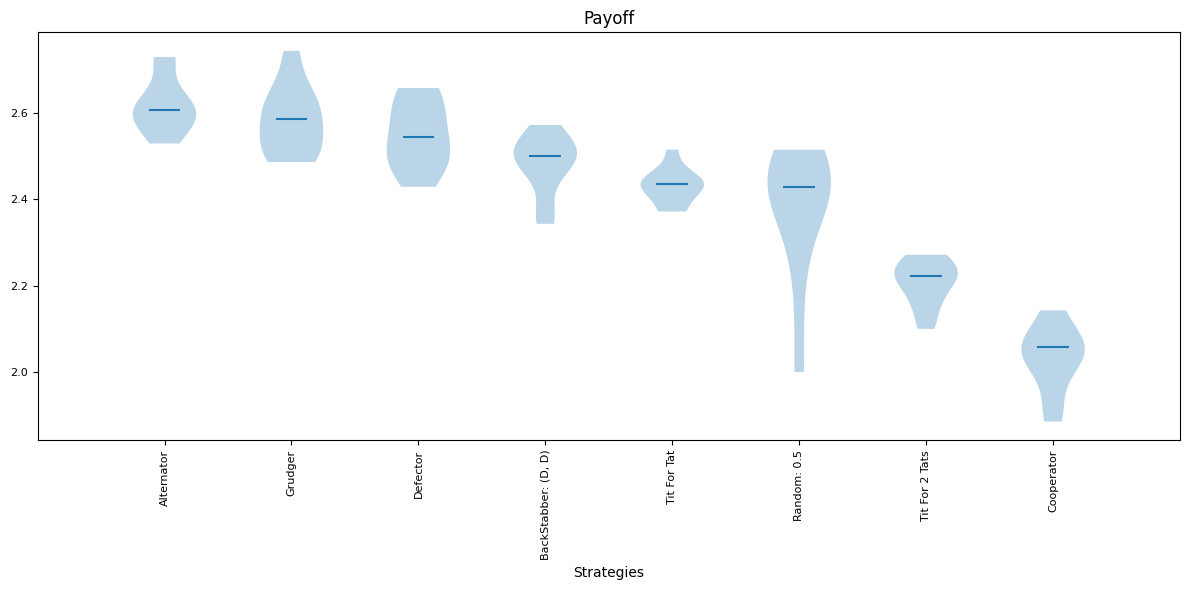

In [17]:
# results set can return a list of named tuples, ordered by strategy rank that summarises the results of the tournament:
summary = results.summarise()
pprint.pprint(summary)

#demonstrating the summary with a box plot
_, ax = plt.subplots()

title = ax.set_title('Payoff')
xlabel = ax.set_xlabel('Strategies')
plot = axl.Plot(results)
p = plot.boxplot(ax=ax)

p.show()

In [18]:
#average scores for each repetition
average_scores = results.scores
print(f"Average_Scores: {average_scores}")

Average_Scores: [[144, 132, 135, 144, 141, 144, 150, 147, 141, 144], [170, 182, 174, 174, 186, 174, 182, 186, 178, 178], [166, 170, 169, 171, 171, 171, 166, 169, 172, 176], [191, 180, 191, 181, 182, 184, 180, 183, 177, 184], [174, 184, 176, 176, 186, 182, 180, 192, 182, 176], [147, 156, 157, 152, 155, 158, 159, 150, 156, 154], [166, 173, 176, 176, 176, 180, 164, 174, 174, 177], [167, 176, 172, 173, 171, 167, 155, 140, 169, 173]]


In [19]:
#finding the best player (Selfish)
best_player = players[average_scores.index(max(average_scores))]
print(f"Best_Player: {best_player}")
results.ranked_names


Best_Player: Alternator


['Alternator',
 'Grudger',
 'Defector',
 'BackStabber: (D, D)',
 'Tit For Tat',
 'Random: 0.5',
 'Tit For 2 Tats',
 'Cooperator']

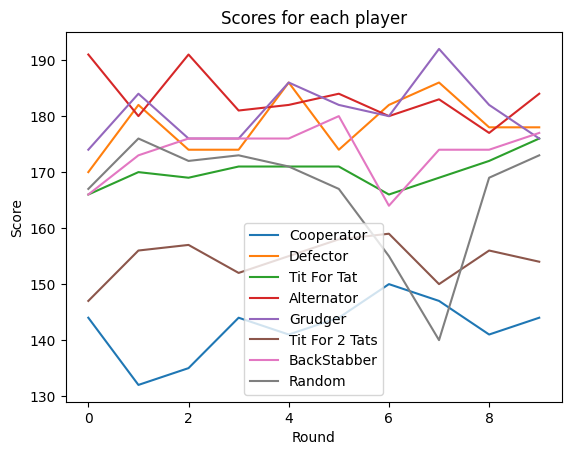

In [20]:
for i, player_scores in enumerate(scores):
    plt.plot(player_scores, label=players[i].name)

# Add a legend, title, and axis labels
plt.legend()
plt.title("Scores for each player")
plt.xlabel("Round")
plt.ylabel("Score")

# Show the plot
plt.show()

In [21]:
#The pair with the highest average score is then identified by iterating through each pair of players and computing the average score for each pair, and keeping track of the pair with the highest average score.
highest_average_score = float("-inf")
best_pair = None

# Iterate through each pair of players
for i in range(len(players)):
    for j in range(i + 1, len(players)):
        # Compute the average score for the current pair of players
        avg_score = sum(scores[i] + scores[j]) / (2 * len(scores[i]))

        # If the average score is higher than the current highest, update the best pair
        if avg_score > highest_average_score:
            highest_average_score = avg_score
            best_pair = (players[i], players[j])

# Print the pair with the highest average
print("Best pair:", best_pair)

Best pair: (Alternator, Grudger)
